In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd


<AxesSubplot:>

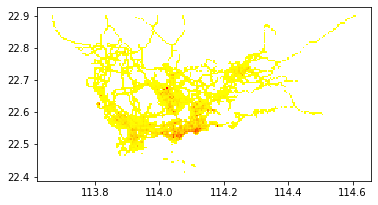

In [2]:

#Read taxi gps data
data = pd.read_csv(r'../example/data/TaxiData-Sample.csv')
data.columns = ['VehicleNum','time','lon','lat','OpenStatus','Speed']


#Generate initial griding params
bounds = [113.6,22.4,114.8,22.9]
params = tbd.grid_params(bounds,accuracy = 500)
data = tbd.clean_outofbounds(data,bounds = bounds,col = ['lon','lat'])

data['LONCOL'],data['LATCOL'] = tbd.GPS_to_grids(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['LONCOL','LATCOL'])['VehicleNum'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.gridid_to_polygon(grid_agg['LONCOL'],grid_agg['LATCOL'],params)
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r')

In [12]:

#Read taxi gps data
data = pd.read_csv(r'../example/data/TaxiData-Sample.csv')
data.columns = ['VehicleNum','time','lon','lat','OpenStatus','Speed']


#Generate initial griding params
bounds = [113.6,22.4,114.8,22.9]
params = tbd.grid_params(bounds,accuracy = 500)
data = tbd.clean_outofbounds(data,bounds = bounds,col = ['lon','lat'])

<AxesSubplot:>

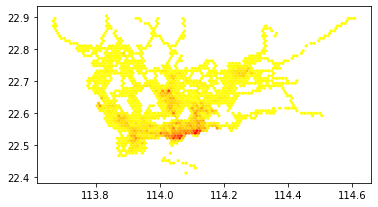

In [15]:
params['method'] = 'hexa'
data['loncol_1'],data['loncol_2'],data['loncol_3'] =  tbd.GPS_to_grids(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['loncol_1','loncol_2','loncol_3'])['VehicleNum'].count().reset_index()
grid_agg['geometry'] = tbd.gridid_to_polygon(grid_agg['loncol_1'],grid_agg['loncol_2'],grid_agg['loncol_3'],params)
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r')

<AxesSubplot:>

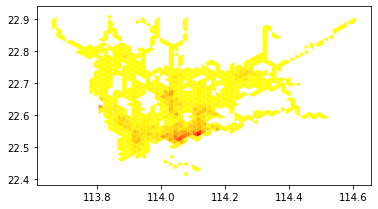

In [11]:
params['method'] = 'tri'
data['loncol_1'],data['loncol_2'],data['loncol_3'] =  tbd.GPS_to_grids(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['loncol_1','loncol_2','loncol_3'])['VehicleNum'].count().reset_index()
grid_agg['geometry'] = tbd.gridid_to_polygon(grid_agg['loncol_1'],grid_agg['loncol_2'],grid_agg['loncol_3'],params)
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r')

In [21]:
params = [113.75, 22.4, 0.04871681446449111, 0.044966052064229066, 25]
tbd.gridid_to_polygon_hexa( 32, -186,-218, params)

ValueError: Shape of passed values is (3, 1), indices imply (3, 3)